In [1]:
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dt_gen = ImageDataGenerator(rescale=1/255,validation_split=0.0)

generator = dt_gen.flow_from_directory('/content/drive/MyDrive/JLYFS_img/',target_size=(300,300),
                                       batch_size=2,class_mode='sparse',shuffle=True,
                                       subset='training')

Found 107 images belonging to 5 classes.


In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

import os
PMOW_dt = os.path.join('/content/drive/MyDrive/JLYFS_img/Portugese_ManOfWar')
MoonJ_dt = os.path.join('/content/drive/MyDrive/JLYFS_img/MoonJelly')
ManeJ_dt = os.path.join('/content/drive/MyDrive/JLYFS_img/ManeJelly')
IJF_dt = os.path.join('/content/drive/MyDrive/JLYFS_img/ImmortalJellyFish')
ASJF_dt = os.path.join('/content/drive/MyDrive/JLYFS_img/Australlian_Spotted_JellyFish')

PMOW_dt_names = os.listdir(PMOW_dt)
MoonJ_dt_names = os.listdir(MoonJ_dt)
IJF_dt_names = os.listdir(IJF_dt)
ASJF_dt_names = os.listdir(ASJF_dt)
ManeJ_dt_names = os.listdir(ManeJ_dt)


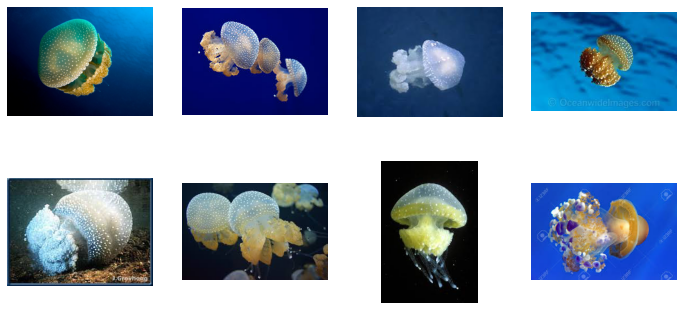

In [16]:
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8

ASJF_pix = [os.path.join(ASJF_dt, fname) 
                for fname in ASJF_dt_names[pic_index-8:pic_index]]

for i, img_path in enumerate(ASJF_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

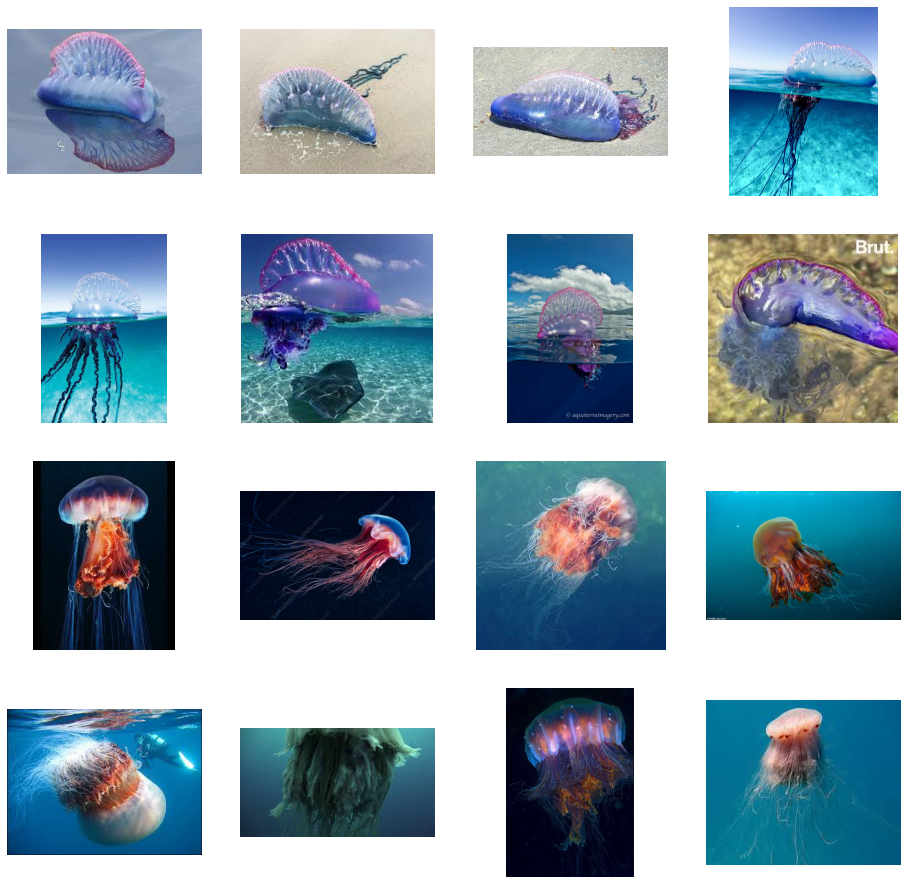

In [17]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
PMOW_pix = [os.path.join(PMOW_dt, fname) 
                for fname in PMOW_dt_names[pic_index-8:pic_index]]

ManeJ_pix = [os.path.join(ManeJ_dt, fname) 
                for fname in ManeJ_dt_names[pic_index-8:pic_index]] 


for i, img_path in enumerate(PMOW_pix+ManeJ_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

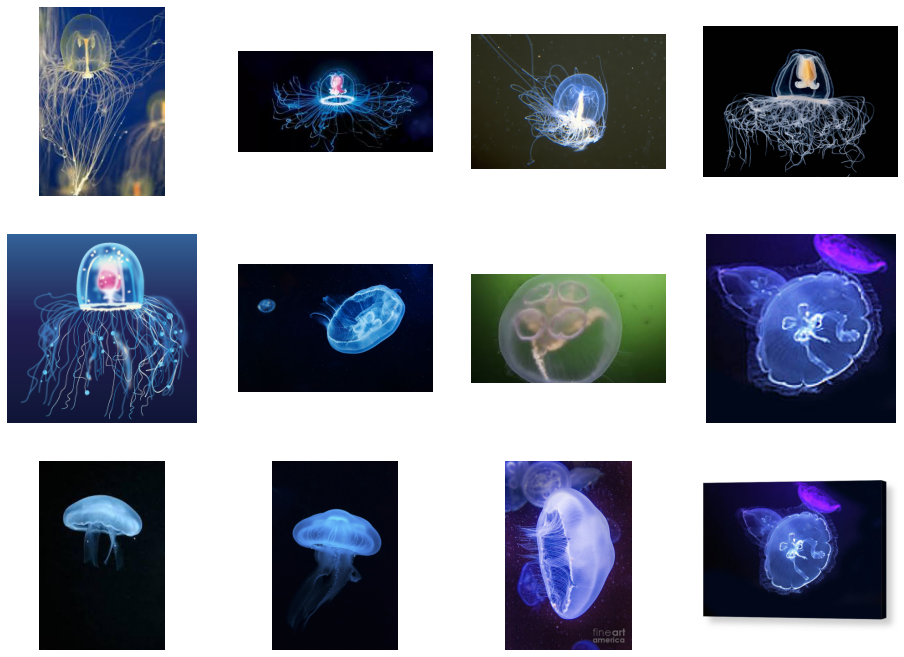

In [18]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

MoonJ_pix = [os.path.join(MoonJ_dt, fname) 
                for fname in MoonJ_dt_names[pic_index-8:pic_index]]

IJF_pix = [os.path.join(IJF_dt, fname) 
                for fname in IJF_dt_names[pic_index-8:pic_index]] 

for i, img_path in enumerate(IJF_pix+MoonJ_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [23]:
mdl = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(20,(3,3),activation='relu',input_shape=(300,300,3)),
                      tf.keras.layers.MaxPooling2D(2,2),
                      tf.keras.layers.Conv2D(20,(3,3),activation='relu'),
                      tf.keras.layers.MaxPooling2D(2,2),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(20,activation='relu'),
                      tf.keras.layers.Dense(5,activation='softmax')
])

In [24]:
mdl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 20)      560       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 20)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 20)      3620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 106580)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2131620   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [25]:
mdl.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='adam',metrics=['acc'])

In [26]:
report = mdl.fit(generator,epochs=20,verbose=1)

Epoch 1/20
54/54 [==============================] - 8s 149ms/step - loss: 2.1576 - acc: 0.2101
Epoch 2/20
54/54 [==============================] - 8s 149ms/step - loss: 1.3979 - acc: 0.3950
Epoch 3/20
54/54 [==============================] - 8s 153ms/step - loss: 0.8706 - acc: 0.6351
Epoch 4/20
54/54 [==============================] - 8s 151ms/step - loss: 0.8504 - acc: 0.7404
Epoch 5/20
54/54 [==============================] - 8s 152ms/step - loss: 0.4642 - acc: 0.8516
Epoch 6/20
54/54 [==============================] - 8s 148ms/step - loss: 0.3463 - acc: 0.9517
Epoch 7/20
54/54 [==============================] - 8s 152ms/step - loss: 0.1314 - acc: 0.9737
Epoch 8/20
54/54 [==============================] - 8s 149ms/step - loss: 0.1030 - acc: 0.9793
Epoch 9/20
54/54 [==============================] - 8s 143ms/step - loss: 0.0252 - acc: 0.9997
Epoch 10/20
54/54 [==============================] - 8s 150ms/step - loss: 0.0418 - acc: 0.9833
Epoch 11/20
54/54 [==============================

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

JellyFish_Classes = { 1 : 'Australian spotted jellyfish' , 2 :'Immortal JellyFish' , 3 :"Lion's mane jellyfish" , 4 :'Moon Jelly', 5 :"Portuguese man o' war"}

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = mdl.predict(images)
  jel_cls = dict(enumerate(classes.flatten(),1))
  jel_cls_ky = list(jel_cls.keys())
  jel_cls_vl = list(jel_cls.values())
  print(JellyFish_Classes[jel_cls_ky[jel_cls_vl.index(1.0)]])
  
  



Saving Aus_Spotted_13.jpg to Aus_Spotted_13 (2).jpg
Australian spotted jellyfish
